In [44]:
import os
import random
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [45]:
directory = "images/"
filename = directory + random.choice(os.listdir(directory))
print(filename)

images/2_Color.png


In [46]:
img = cv.imread(filename)
width = 10.
img = cv.resize(img, (1920, 1080))

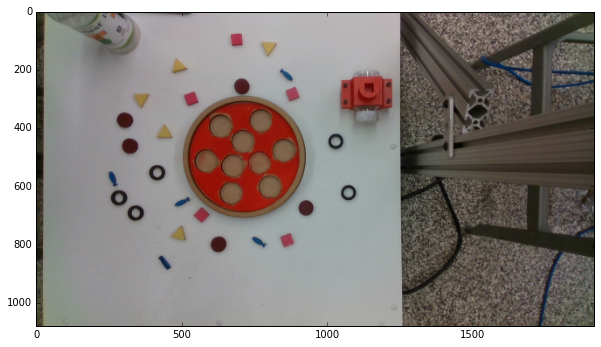

In [47]:
def showimg(image, cmap="gray"):
    plt.figure(figsize=(width, width*img.shape[0]/img.shape[1]))
    image_copy = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image_copy, cmap=cmap, aspect='auto')
    plt.show()
showimg(img)

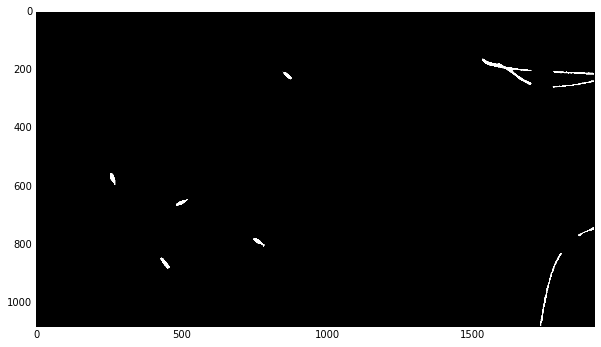

In [48]:
lower = np.array([100,150,0])
upper = np.array([140,255,255])
hsv_image = cv.cvtColor(img, cv.COLOR_BGR2HSV)
masked_hsv = cv.inRange(hsv_image, lower, upper)
showimg(masked_hsv)

In [49]:
retval, labels = cv.connectedComponents(masked_hsv)
print("num components: {}".format(retval))

num components: 11


372
(863, 220)


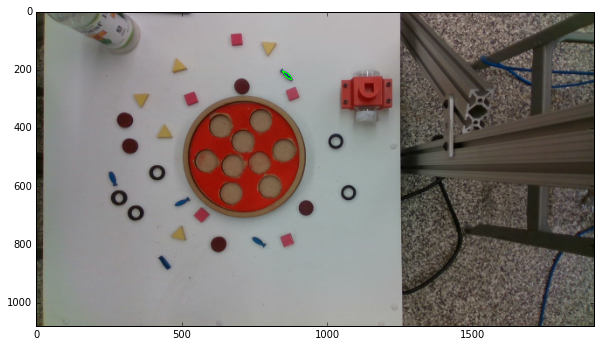

755
(1848, 251)


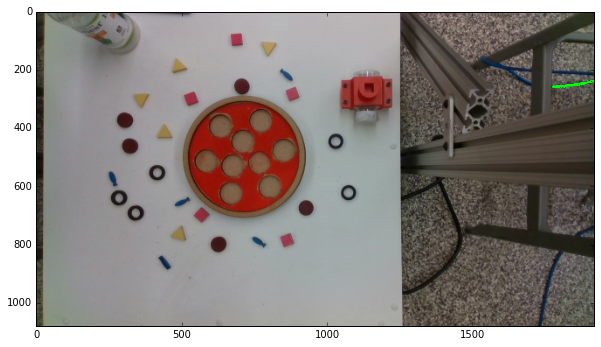

498
(262, 573)


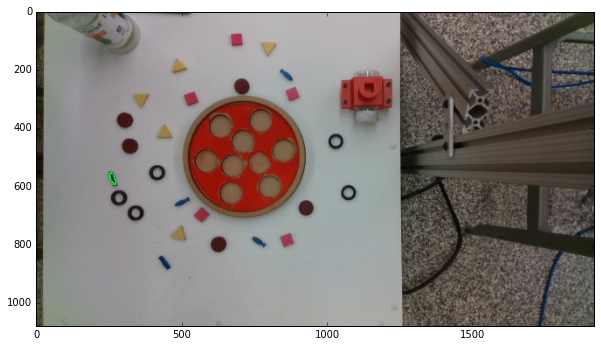

426
(499, 656)


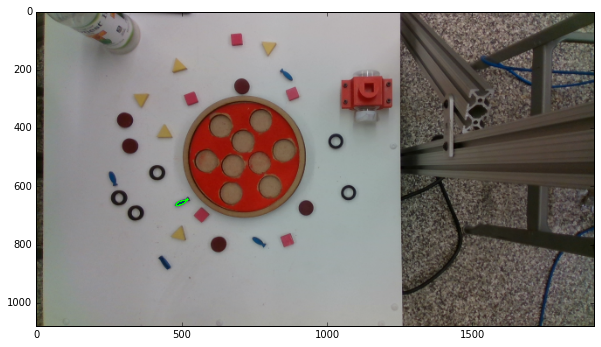

367
(1891, 754)


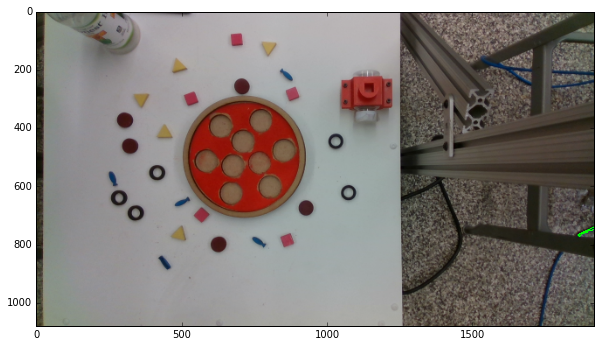

460
(763, 790)


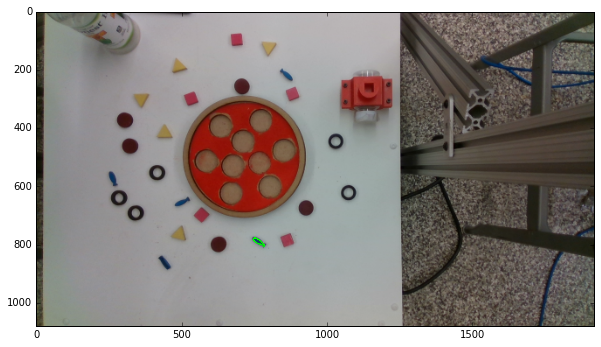

529
(442, 864)


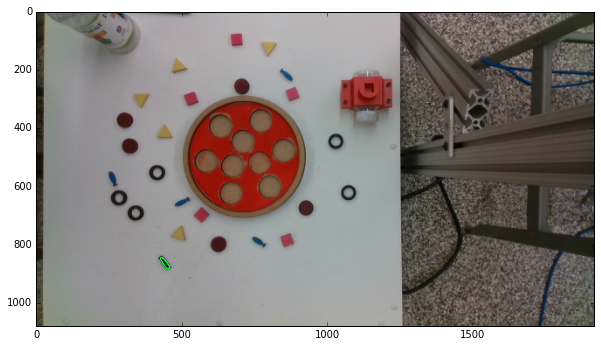

In [50]:
for label in range(retval):
    new_img = (labels == label).astype("int")
    if 150 < np.sum(new_img) < 800:
        print(np.sum(new_img))
        new_img = np.array(new_img*255, dtype=np.uint8)
        _, thresh = cv.threshold(new_img, 127, 255, cv.THRESH_BINARY)
        M = cv.moments(thresh)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        print(cX, cY)
        contours, _ = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
        img_copy = np.copy(img)
        img_copy = cv.drawContours(img_copy, contours, -1, [0, 255, 0], 4)
        showimg(img_copy)